In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


Lấy dữ liệu

In [ ]:
#Load dữ liệu của file wecode.csv và file score_training lần lượt là:
df1 = pd.read_csv('https://raw.githubusercontent.com/truyenaaa123/CS114.L22.KHCL/main/BaiTapColab/DiemCuoiKy/wecode%20(1).csv')
df2 = pd.read_csv('https://raw.githubusercontent.com/truyenaaa123/CS114.L22.KHCL/main/BaiTapColab/DiemCuoiKy/score_training%20(1).csv')

Xóa dữ liệu không ảnh hưởng đến điểm cuối kỳ 

In [ ]:
df1 = df1.drop(columns= ['file_name', 'language_id', 'id', 'updated_at', 'status'])

In [ ]:
list_score=df2
df2 = df2.drop(columns= ['QT', 'GK', 'TH', 'TBM','TBTL']).rename(columns = {'id': 'user_id'}, inplace =False)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264606 entries, 0 to 264605
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   assignment_id  264606 non-null  int64 
 1   problem_id     264606 non-null  int64 
 2   user_id        264606 non-null  int64 
 3   is_final       264606 non-null  int64 
 4   pre_score      264606 non-null  int64 
 5   coefficient    264606 non-null  object
 6   created_at     264606 non-null  object
dtypes: int64(5), object(2)
memory usage: 14.1+ MB


In [ ]:
# Thay đổi từ Object sang Numberic
df2['CK'] = df2['CK'].apply(pd.to_numeric, errors='coerce')
df1['coefficient']=df1['coefficient'].apply(pd.to_numeric,errors='coerce')

Merge 2 dữ liệu lại

In [ ]:
df3 = pd.merge(df1,df2,on='user_id')
df3['created_at'] = pd.DatetimeIndex(df3['created_at']).astype(np.int64) // 10**9

In [ ]:
df3

,assignment_id,problem_id,user_id,is_final,pre_score,coefficient,created_at,CK
0,7,10,1439,0,0,100.0,1604290471,8.5
1,7,10,1439,0,0,100.0,1604290599,8.5
2,7,1,1439,0,0,100.0,1604290748,8.5
3,7,10,1439,0,0,100.0,1604290859,8.5
4,7,10,1439,0,0,100.0,1604291505,8.5
...,...,...,...,...,...,...,...,...
207583,383,313,1452,1,10000,100.0,1616257667,6.0
207584,383,318,1452,1,10000,100.0,1616257699,6.0
207585,383,319,1452,1,10000,100.0,1616257726,6.0
207586,383,317,1452,1,10000,100.0,1616257740,6.0


# Thông tin dữ liệu

In [ ]:
name = list(df1.columns)


Số sinh viên có kết quả tham gia thực hành là: 1159 (trong file wecode.csv)


In [ ]:
df1.user_id.value_counts().count()

1159

Số sinh viên có kết quả môn học là: 975 (trong file score_training.csv)

In [ ]:
df2['user_id'].value_counts().count()

975

số lần **submit** của mỗi sv

In [ ]:
nb_submit_user= df3.value_counts('user_id').reset_index(name='number_submit')
# thêm cột number_submit
dt_wecode=pd.merge(df3,nb_submit_user,on='user_id',how='inner')
nb_submit_user


,user_id,number_submit
0,317,1359
1,1487,974
2,1191,813
3,695,800
4,1460,757
...,...,...
848,1122,3
849,934,2
850,1757,2
851,685,1


dữ liệu pre_score = 10000 và is_final = 1

In [ ]:
dt_wecode

,assignment_id,problem_id,user_id,is_final,pre_score,coefficient,created_at,CK,number_submit
0,7,10,1439,0,0,100.0,1604290471,8.5,268
1,7,10,1439,0,0,100.0,1604290599,8.5,268
2,7,1,1439,0,0,100.0,1604290748,8.5,268
3,7,10,1439,0,0,100.0,1604290859,8.5,268
4,7,10,1439,0,0,100.0,1604291505,8.5,268
...,...,...,...,...,...,...,...,...,...
207583,383,313,1452,1,10000,100.0,1616257667,6.0,63
207584,383,318,1452,1,10000,100.0,1616257699,6.0,63
207585,383,319,1452,1,10000,100.0,1616257726,6.0,63
207586,383,317,1452,1,10000,100.0,1616257740,6.0,63


In [ ]:

#số bài nộp đạt pre_score == 10000 & df3.is_final==1
temp1=df3.filter(items=['pre_score', 'is_final', 'CK', 'user_id']).loc[(df3.pre_score == 10000) & (df3.is_final==1)]
n1=len(temp1)
#số problem trong hệ thống
n2=len(df1.groupby('problem_id'))


print('numbers problem :',n2)
print('numbers successful submission',n1)

numbers problem : 634
numbers successful submission 74834


Những problem có số lần nộp nhiều nhất

In [ ]:
df1.value_counts('problem_id').reset_index(name='number_submit').head(10)

,problem_id,number_submit
0,86,4732
1,6,4417
2,4,4213
3,240,3836
4,319,3356
5,1,3249
6,359,3096
7,87,2997
8,3,2992
9,82,2964


# Đang ngồi mò

**sum_pre_score** and **final score**

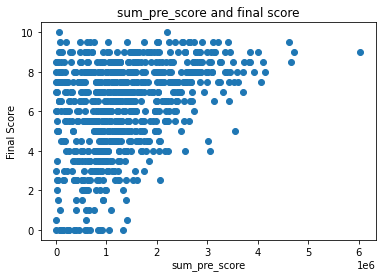

        assignment_id  problem_id  user_id  ...   CK  number_submit  sum_pre_score
0                   7          10     1439  ...  8.5            268        1263325
1                   7          10     1439  ...  8.5            268        1263325
2                   7           1     1439  ...  8.5            268        1263325
3                   7          10     1439  ...  8.5            268        1263325
4                   7          10     1439  ...  8.5            268        1263325
...               ...         ...      ...  ...  ...            ...            ...
207583            383         313     1452  ...  6.0             63         460000
207584            383         318     1452  ...  6.0             63         460000
207585            383         319     1452  ...  6.0             63         460000
207586            383         317     1452  ...  6.0             63         460000
207587            383         316     1452  ...  6.0             63         460000

[20

In [ ]:
#tổng pre_score của mỗi sv
test = dt_wecode.filter(items=['pre_score', 'user_id'])
test = test.groupby(['user_id']).sum()
test=test.reset_index().rename(columns={'pre_score':'sum_pre_score'})
list_sum_score=pd.merge(test,df2,on='user_id',how='inner')
#vẽ scatter xem mối liên hệ giữa final score và sum_pre_score
plt.scatter(x =list_sum_score['sum_pre_score'], y =list_sum_score['CK'])
plt.title("sum_pre_score and final score")
plt.xlabel('sum_pre_score')
plt.ylabel('Final Score') 
plt.show()
#merge lại với dt_wecode
dt_wecode=pd.merge(dt_wecode,list_sum_score[['user_id','sum_pre_score']],on='user_id',how='inner')
print(dt_wecode)

Phân tích **assignment_id** và **problem_id**
Ta 

In [ ]:
dftest = df1.filter(items=['assignment_id', 'problem_id'])
pd.set_option('display.max_rows', 100)
dftest = dftest.drop_duplicates(subset=['assignment_id','problem_id'])
test = dftest
pt = dftest.groupby(['assignment_id'], as_index= False).count()
pt.sort_values(by=['problem_id'], ascending=False).head(7)


,assignment_id,problem_id
0,0,352
270,354,200
255,337,76
256,339,62
120,165,50
288,383,47
128,175,42


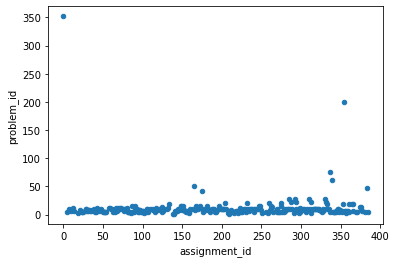

In [ ]:
pt.plot.scatter(x="assignment_id", y="problem_id", alpha = 1)

In [ ]:
test = test.loc[test.assignment_id == 0]
test.sort_values(by=['problem_id'])

,assignment_id,problem_id
161452,0,1
1959,0,2
0,0,3
1,0,4
2,0,5
...,...,...
234467,0,640
234572,0,641
264084,0,695
264132,0,697


Phân tích **assignment_id** và **user_id**

In [ ]:
asssv = df1.filter(items=['user_id', 'assignment_id'])

In [ ]:
asssv.loc[asssv.user_id == 344]

In [ ]:
asssv = asssv.drop_duplicates(subset=['user_id', 'assignment_id'])
t = asssv.groupby(['assignment_id'], as_index=False).count()
max(t.user_id)

251

In [ ]:
t = asssv.groupby(['user_id'], as_index=False).count()
t.loc[t.assignment_id < 20]

In [ ]:
df1.drop_duplicates(subset="assignment_id")

In [ ]:
df2ano = df2.loc[(df2.is_final == 1) & (df2.pre_score == 10000)]
df2ano = df2ano.groupby(['user_id']).count()
print(type(df2ano))

<class 'pandas.core.frame.DataFrame'>


1157

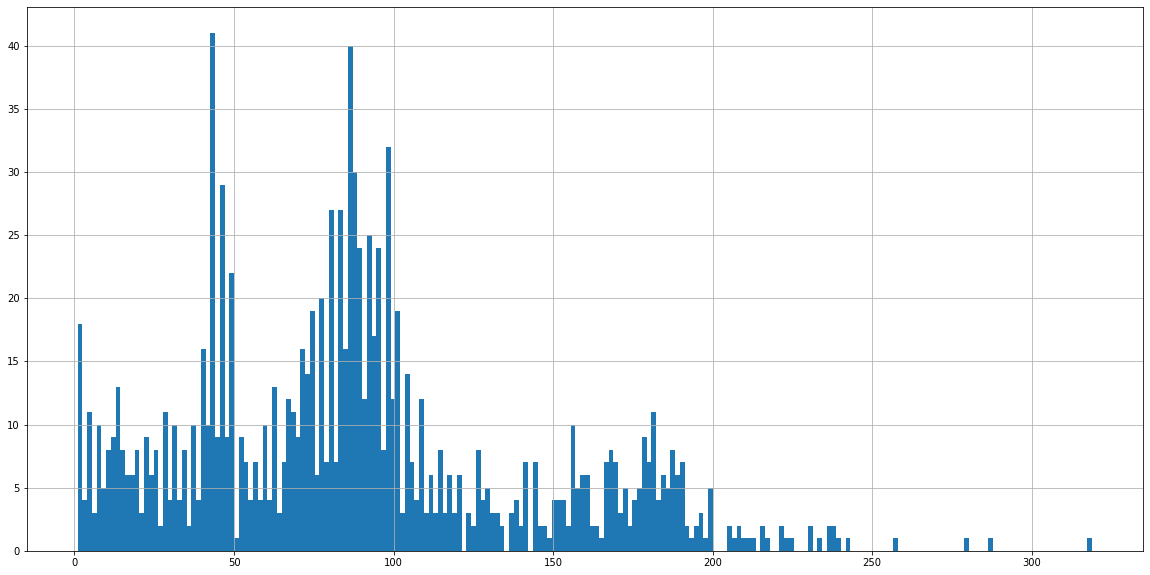

In [ ]:
dft = df1.loc[(df1.is_final == 1), ['user_id', 'assignment_id', 'problem_id']]
t = dft.groupby('user_id')['user_id'].size().to_frame(name = 'count').reset_index()
t.sort_values(by='count', ascending= False)
t['count'].hist(bins = 214,figsize = (20,10))
t = t.groupby('count')['count'].size().to_frame(name = 'each').reset_index()
t.sort_values(by='each', ascending= False)
sum(t.each)

In [ ]:
dft.groupby('user_id')['user_id'].size().to_frame(name = 'count').reset_index()


NameError: ignored

**number of submissions** and **Final Score**

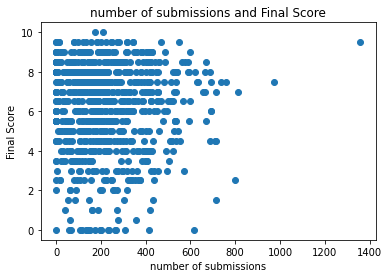

In [ ]:
data1=df3.drop(columns= ['assignment_id', 'problem_id', 'is_final', 'pre_score', 'coefficient','created_at'])
data1.dropna()
temp1=data1.groupby('user_id').count()# so lan submit
temp1=pd.DataFrame(data=temp1)
temp1=np.array(temp1)
temp2=df3.drop_duplicates(subset='user_id')
temp2=np.array(temp2['CK'])# diem CK
plt.scatter(y =temp2, x =temp1)
plt.title("number of submissions and Final Score")
plt.xlabel('number of submissions')
plt.ylabel('Final Score') 
plt.show()

**Tb hệ số nộp trễ của mỗi SV** và **điểm CK**

        assignment_id  problem_id  user_id  ...  sum_pre_score      sum  avg of cfc
0                   7          10     1439  ...        1263325  26800.0       100.0
1                   7          10     1439  ...        1263325  26800.0       100.0
2                   7           1     1439  ...        1263325  26800.0       100.0
3                   7          10     1439  ...        1263325  26800.0       100.0
4                   7          10     1439  ...        1263325  26800.0       100.0
...               ...         ...      ...  ...            ...      ...         ...
207583            383         313     1452  ...         460000   6300.0       100.0
207584            383         318     1452  ...         460000   6300.0       100.0
207585            383         319     1452  ...         460000   6300.0       100.0
207586            383         317     1452  ...         460000   6300.0       100.0
207587            383         316     1452  ...         460000   6300.0     

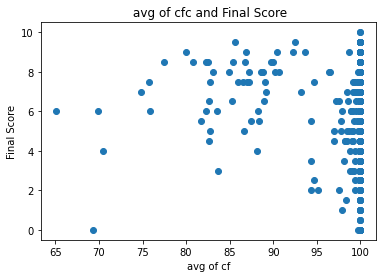

In [ ]:
#temp3 = file_wecode2[file_wecode2['is_final'] == 1][['user_id', 'pre_score']] # Tổng pre_score is_final = 1
temp = df3.groupby('user_id').sum()['coefficient']
temp=temp.reset_index(name='sum')
# merger vs dt_wecode
dt_wecode=pd.merge(dt_wecode,temp,on='user_id',how='inner')
dt_wecode['avg of cfc']=dt_wecode['sum']/dt_wecode['number_submit']
dt_wecode=dt_wecode.drop(columns={'sum'})


dt_test1=dt_wecode.drop_duplicates(subset='user_id').sort_values(by=['user_id'])
print(dt_wecode)
#xem mối liên hệ
plt.scatter(y=dt_test1['CK'], x =dt_test1['avg of cfc'])
plt.title(" avg of cfc and Final Score")
plt.xlabel('avg of cf')
plt.ylabel('Final Score') 
plt.show()


**Thời gian**

In [ ]:
final = df3.drop(columns=['pre_score', 'coefficient', 'CK'])
final

,assignment_id,problem_id,user_id,is_final,created_at
0,7,10,1439,0,1604290471
1,7,10,1439,0,1604290599
2,7,1,1439,0,1604290748
3,7,10,1439,0,1604290859
4,7,10,1439,0,1604291505
...,...,...,...,...,...
207583,383,313,1452,1,1616257667
207584,383,318,1452,1,1616257699
207585,383,319,1452,1,1616257726
207586,383,317,1452,1,1616257740


In [ ]:
time = df3.drop(columns=['pre_score', 'coefficient', 'CK', 'is_final'])
time = time.groupby(by= ['user_id', 'assignment_id', 'problem_id']).min().reset_index()
time.sort_values(by= ['user_id', 'assignment_id', 'problem_id'])

,user_id,assignment_id,problem_id,created_at
0,24,8,12,1604598395
1,24,8,14,1604598528
2,24,8,15,1604598760
3,24,8,16,1604598422
4,24,8,17,1604598875
...,...,...,...,...
80606,1865,295,549,1610792995
80607,1865,296,364,1611666107
80608,1865,296,365,1611664929
80609,1865,296,368,1611663367


In [ ]:
x = pd.merge(
    final,time,on=['user_id', 'assignment_id', 'problem_id', 'created_at']
    ).sort_values(by= ['user_id', 'assignment_id', 'problem_id'])
x.drop_duplicates(subset= ['user_id', 'assignment_id', 'problem_id'])

,assignment_id,problem_id,user_id,is_final,created_at
29339,8,12,24,1,1604598395
29341,8,14,24,0,1604598528
29343,8,15,24,1,1604598760
29340,8,16,24,1,1604598422
29345,8,17,24,1,1604598875
...,...,...,...,...,...
74846,295,549,1865,0,1610792995
74855,296,364,1865,0,1611666107
74854,296,365,1865,0,1611664929
74853,296,368,1865,1,1611663367


In [ ]:
df3.drop_duplicates(subset= ['user_id', 'assignment_id', 'problem_id'])

,assignment_id,problem_id,user_id,is_final,pre_score,coefficient,created_at,CK
0,7,10,1439,0,0,100.0,1604290471,8.5
2,7,1,1439,0,0,100.0,1604290748,8.5
7,7,3,1439,0,0,100.0,1604292093,8.5
15,7,4,1439,0,0,100.0,1604308387,8.5
25,7,8,1439,0,0,100.0,1604314393,8.5
...,...,...,...,...,...,...,...,...
207582,383,313,1452,0,0,100.0,1616257646,6.0
207584,383,318,1452,1,10000,100.0,1616257699,6.0
207585,383,319,1452,1,10000,100.0,1616257726,6.0
207586,383,317,1452,1,10000,100.0,1616257740,6.0


In [ ]:
df3.loc[df3.is_final == 1].sort_values(by=['user_id', 'assignment_id', 'problem_id'])

,assignment_id,problem_id,user_id,is_final,pre_score,coefficient,created_at,CK
77504,8,12,24,1,10000,100.0,1604598395,9.5
77507,8,14,24,1,10000,100.0,1604598584,9.5
77510,8,15,24,1,10000,100.0,1604598760,9.5
77505,8,16,24,1,10000,100.0,1604598422,9.5
77512,8,17,24,1,10000,100.0,1604598875,9.5
...,...,...,...,...,...,...,...,...
195106,295,549,1865,1,10000,100.0,1610794241,7.5
195144,296,364,1865,1,1428,100.0,1611666219,7.5
195142,296,365,1865,1,10000,100.0,1611665002,7.5
195140,296,368,1865,1,0,100.0,1611663367,7.5




```
```
#Tạo Model dự đoán điểm CK còn thiếu

In [ ]:
#tạo data train
dt_train=dt_wecode.dropna(axis=0).drop_duplicates(subset='user_id')
x_train=np.array(dt_train.filter(items=['avg of cfc','number_submit','sum_pre_score']))
y_train=np.array(dt_train['CK'])
print(dt_train.filter(items=['avg of cfc','number_submit','sum_pre_score']))

        avg of cfc  number_submit  sum_pre_score
0            100.0            268        1263325
268          100.0            216        1452635
484          100.0            420        2137056
904          100.0            239        1552462
1143         100.0            247        1263788
...            ...            ...            ...
207421       100.0             18          20000
207439       100.0             57         425000
207496       100.0             15          75000
207511       100.0             14          58000
207525       100.0             63         460000

[806 rows x 3 columns]


In [ ]:
#lấy ra data có điểm CK còn trống
temp=dt_wecode.drop_duplicates(subset='user_id')
is_NaN = temp.isnull()
rows_with_NaN = temp[is_NaN['CK']]# những sv có điểm CK == NaN
dt_test=rows_with_NaN.drop(columns=['assignment_id'	, 'problem_id', 'is_final', 'pre_score','coefficient','created_at'])
x_test=np.array(dt_test.filter(items=['avg of cfc', 'number_submit','sum_pre_score']))

In [ ]:
#train model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(x_train, y_train)
y_predict = model.predict(x_train)

#làm tròn điểm CK dự đoán đc
y_predict = y_predict*2.0
y_predict = y_predict.astype(int)
y_predict = np.round_(y_predict/2, decimals=1, out=None)

# độ chính xác
MSE=mean_squared_error(y_train,y_predict)
print('MSE : ',MSE)
#dùng model dự đoán điểm CK của các sv 
y_test1=model.predict(x_test)
y_test1 = y_test1*2.0
y_test1 = y_test1.astype(int)
y_test1 = np.round_(y_test1/2, out=None)
dt_test['CK']=y_test1
dt_test




MSE :  4.300558312655087


,user_id,CK,number_submit,sum_pre_score,sum,avg of cfc
13064,1546,6.0,434,2173972,42415.0,97.730415
13498,240,7.0,623,3066214,58509.0,93.914928
14121,1367,6.0,266,1538435,25173.0,94.635338
14387,1661,6.0,462,1997300,42293.0,91.543290
19872,1408,6.0,249,1557928,24572.0,98.682731
20121,391,6.0,379,2085960,35690.0,94.168865
20500,1406,7.0,441,2415037,41266.0,93.573696
20941,1458,6.0,358,1719842,34586.0,96.608939
21299,1633,7.0,472,2544851,48254.0,102.233051
21771,989,8.0,483,2730213,45898.0,95.026915
